# CS Project


In [2]:
!pip install plotly==5.1.0
!pip install -U kaleido
!pip install nbformat
!pip install --upgrade nbformat

In [2]:
import plotly as py
import pandas as pd
import plotly.express as px
import json
import numpy as np 
import pythonlibraries.Heatmap_Generator as heatmap
import kaleido
import os
import glob
import matplotlib.pyplot as plt


In [3]:
INDIA_STATE_GEOMETRY_PATH = "Mapfile\states_india.geojson"
INDIA_STATE_KEYS_PATH = "Mapfile\mapping_key.csv"
DISEASE_RISK_PATH = "risk_csv"
DISEASE_PATH = 'disease_csv'
MAP_PATH = 'maps'

In [4]:
def mapping_key_generator():
    df = pd.read_csv("Diseases\AH.csv") #

    india_states = json.load(open('Mapfile\states_india.geojson', 'r'))

    cid = pd.DataFrame(df[['state_mapper','Location']])

    cid.to_csv('Mapfile\mapping_key.csv')

In [5]:
def utility2(india_states):
  state_id_map = {}
  for feature in india_states['features']:
    feature['id'] = feature['properties']['state_code']
    state_id_map[feature['properties']['st_nm']] = feature['id']
  return india_states

In [6]:
def map_key_adder(csv_to_concat,csv_to_concat_with): 
    #ld = pd.read_csv('Lead.csv')
    MAP_PRINT = pd.merge(csv_to_concat_with,csv_to_concat)
    return MAP_PRINT

In [7]:
def variance_col_adder(a,df_name):
    a = pd.read_csv("Child Underweight.csv")
    variance = a.var()['Value']
    Variance = a['Value'] - a['Value']*variance
    a['Variance'] = Variance
    a.to_csv(file=os.path.join('norm_risk',f'{df_name}.csv'))
    return a
    
    

In [8]:
def get_all_csv(specific_path):
    path = os.getcwd()
    csv_files = glob.glob(os.path.join(path,specific_path,"*.csv"))
    return csv_files

#PLOT MAP


In [10]:
def map_plot(map_csv,geo_json, map_write_path,names,a):
    map_csv['id'] = map_csv['state_mapper']
    fig = px.choropleth(map_csv, locations ='id', geojson = geo_json, color = 'Value')
    fig.update_geos(fitbounds = 'locations', visible= False)
    fig.update_layout(
    title_text = names
     # limite map scope to USA
)
    # fig.show()
    fig.write_image(file=os.path.join(a,'maps',f'{names}.png'), format='png')

In [11]:
CSV_FILES = get_all_csv("disease_csv_r")
cid = pd.read_csv(INDIA_STATE_KEYS_PATH)

india_states = json.load(open('Mapfile\states_india.geojson', 'r'))
india_states = utility2(india_states)
for f in CSV_FILES:
    print(f)
    df = pd.read_csv(f)
    map_print = map_key_adder(df,cid)
    splitf = f.split('\\')
    print(splitf[-1].split('.')[0])
    map_plot(map_print,india_states , MAP_PATH,splitf[-1].split('.')[0],DISEASE_RISK_PATH)
    

f:\Code\CS project Health\Health\disease_csv_r\Alzheimer.csv
Alzheimer


#PLOT LINE

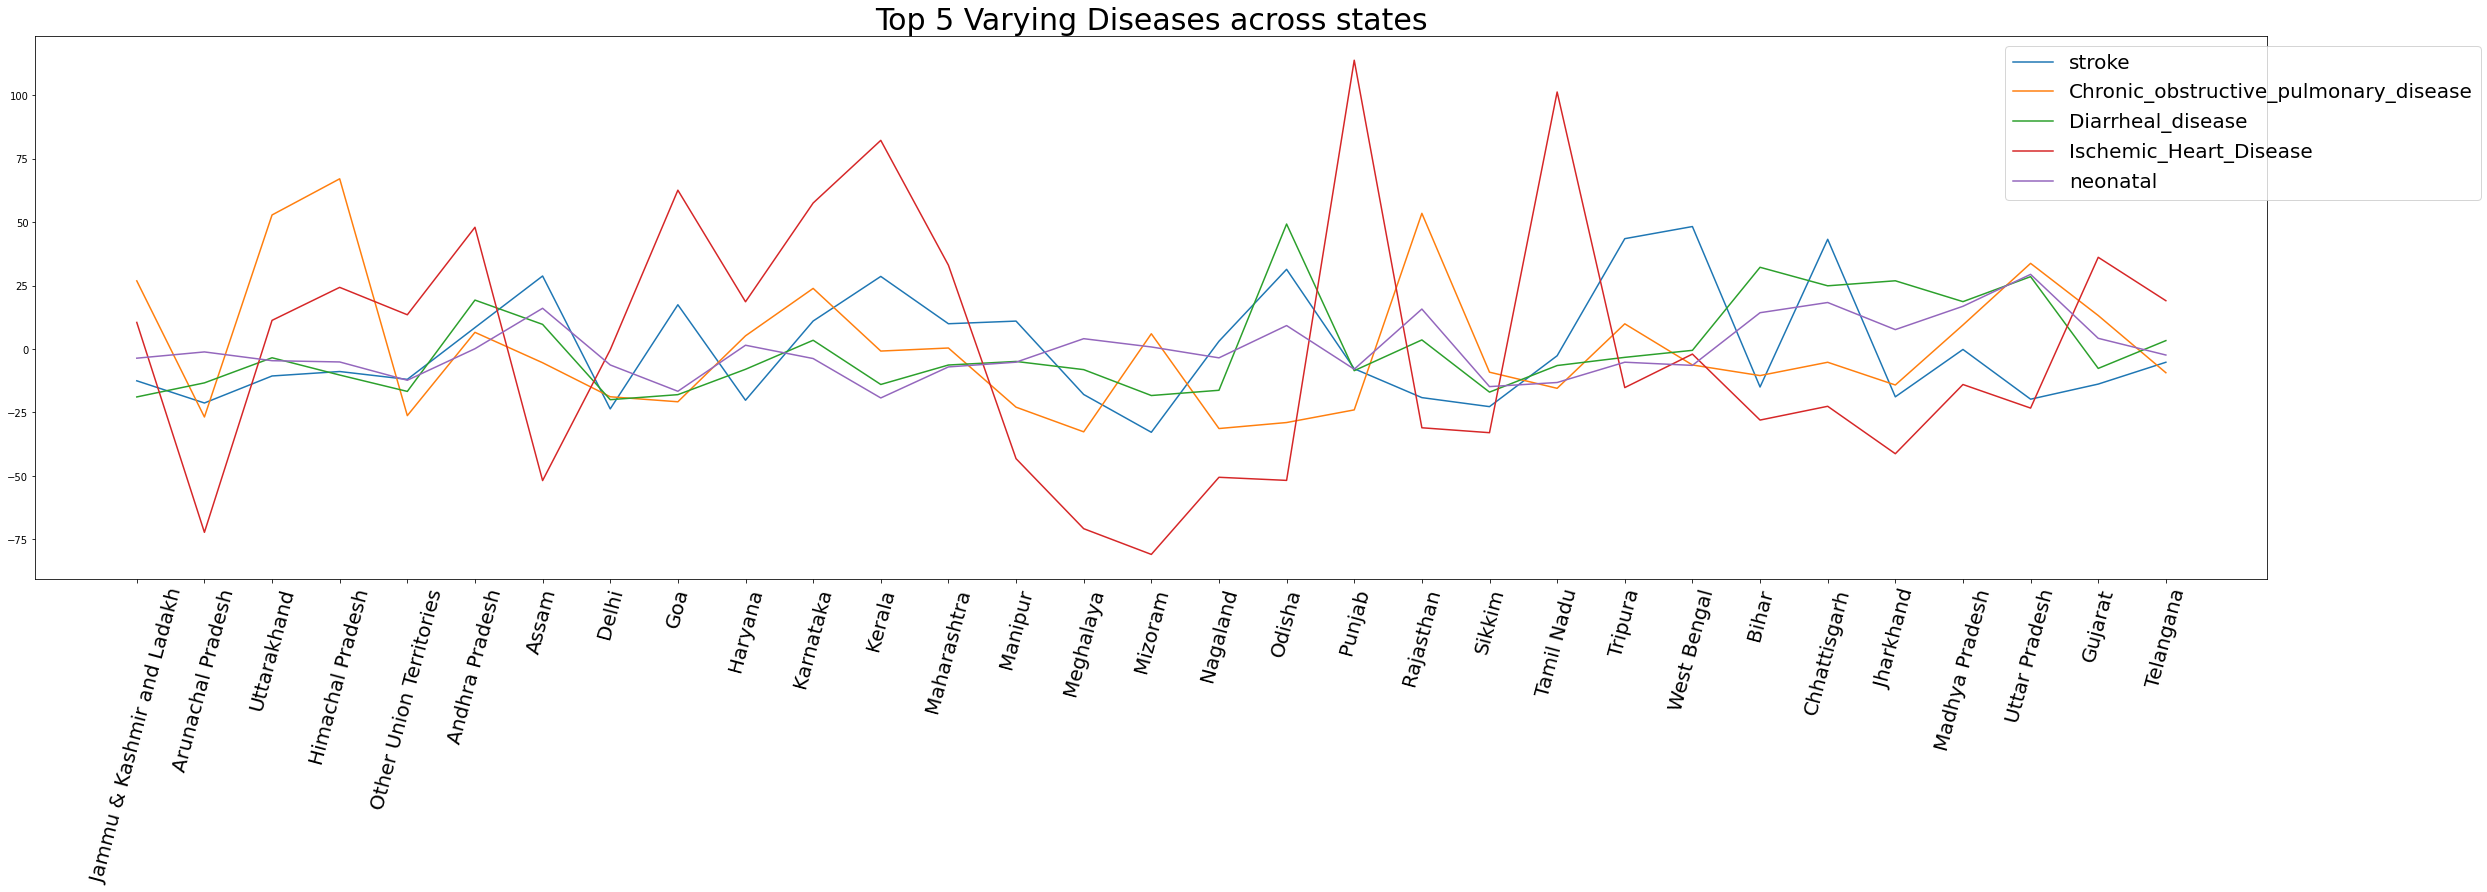

In [26]:
CSV_FILES = get_all_csv("disease_csv_r/top5VaryDIsease_r")
csv_file = CSV_FILES
f = plt.figure()
for i in range(len(csv_file)):
    #reading csv
    x = pd.read_csv(csv_file[i-1])
    df = pd.DataFrame(x)
    #Calculating and Setting variance
    df['variance']=df['Value'] - df["Value"].mean()
    #finding file name
    splitf = csv_file[i-1].split(os.path.sep)
    name_file = splitf[-1].split('.')[0]
    #plotting variance vs State line graph
    plt.plot(df['Location'].tolist(), df['variance'].tolist(), label = splitf[-1].split('.')[0])   
    f.set_figwidth(40)
    f.set_figheight(10)
plt.xticks(rotation = 75, fontsize = 20)
plt.legend(loc='best', bbox_to_anchor=(.1, 0, 1, 1),fontsize = 20)
plt.title("Top 5 Varying Diseases across states", fontsize = 30)
plt.show()



C:\Users\saama\AppData\Local\Temp\ipykernel_20052\2065428849.py:30: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


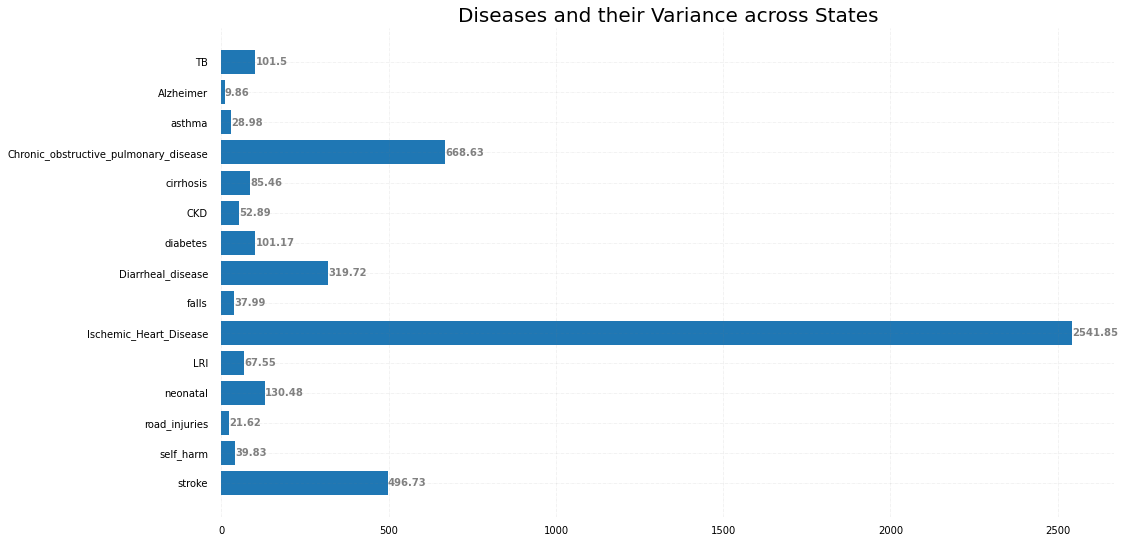

In [16]:
csv_file = get_all_csv("disease_csv_r")

var_dict={}
for i in range(len(csv_file)):
    x = pd.read_csv(csv_file[i-1])
    df = pd.DataFrame(x)
    splitf = csv_file[i-1].split(os.path.sep)
    name_file = splitf[-1].split('.')[0]
    var_dict[name_file]=df['Value'].var()
fig, ax = plt.subplots(figsize =(16, 9))

a=pd.DataFrame(list(var_dict.keys()))
b=pd.DataFrame(list(var_dict.values()))
# Horizontal Bar Plot
ax.barh( a[0],b[0])
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Diseases and their Variance across States', fontsize = 20
              )
# Show Plot
plt.show()

2nd Iteration


In [32]:
CSV_FILES = get_all_csv("disease_csv")
csv_file = []
for f in CSV_FILES:
    csv_file.append(f)
#print(csv_file)
f = plt.figure()
df_pop = pd.read_csv('populationperstate.csv')
#plt.autoscale()
for i in range(len(csv_file)):
    x = pd.read_csv(csv_file[i-1])
    df = pd.DataFrame(x)
    #print(df)
    df['Value'].dropna()
    dfinal = df.merge(df_pop, on="Location", how = 'inner')
    splitf = csv_file[i-1].split(os.path.sep)
    dfinal["pct"] = dfinal["Value"]/ dfinal['Total Population'] *100
    
    #plt.legend(splitf[-1].split('.')[0])
    #plt.plot(df['Location'].tolist(), df['[pct]'].tolist(), label = splitf[-1].split('.')[0])
    #art.Artist.set_label(csv_file)
    print(dfinal.head())
    #f.set_figwidth(40)
    #f.set_figheight(10)
#plt.xticks(rotation = 75, fontsize = 20)
#plt.legend(loc='best', bbox_to_anchor=(.1, 0, 1, 1),fontsize = 20)


                     Location  Year       Age   Sex Cause of death or injury  \
0  Jammu & Kashmir and Ladakh  2019  All ages  Both             Tuberculosis   
1           Arunachal Pradesh  2019  All ages  Both             Tuberculosis   
2                 Uttarakhand  2019  All ages  Both             Tuberculosis   
3            Himachal Pradesh  2019  All ages  Both             Tuberculosis   
4     Other Union Territories  2019  All ages  Both             Tuberculosis   

              Measure      Value  Lower bound  Upper bound  Total Population  \
0  Deaths per 100,000  15.338328    12.644056    19.359440          13895343   
1  Deaths per 100,000  22.821366    17.672766    28.765897           1570458   
2  Deaths per 100,000  41.442732    33.186365    51.564207          11250858   
3  Deaths per 100,000  25.979198    20.367196    32.404502           7451955   
4  Deaths per 100,000  20.922883    15.755898    28.111645           3677958   

        pct  
0  0.000110  
1  0.00145

<Figure size 432x288 with 0 Axes>

Deaths vs disease

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

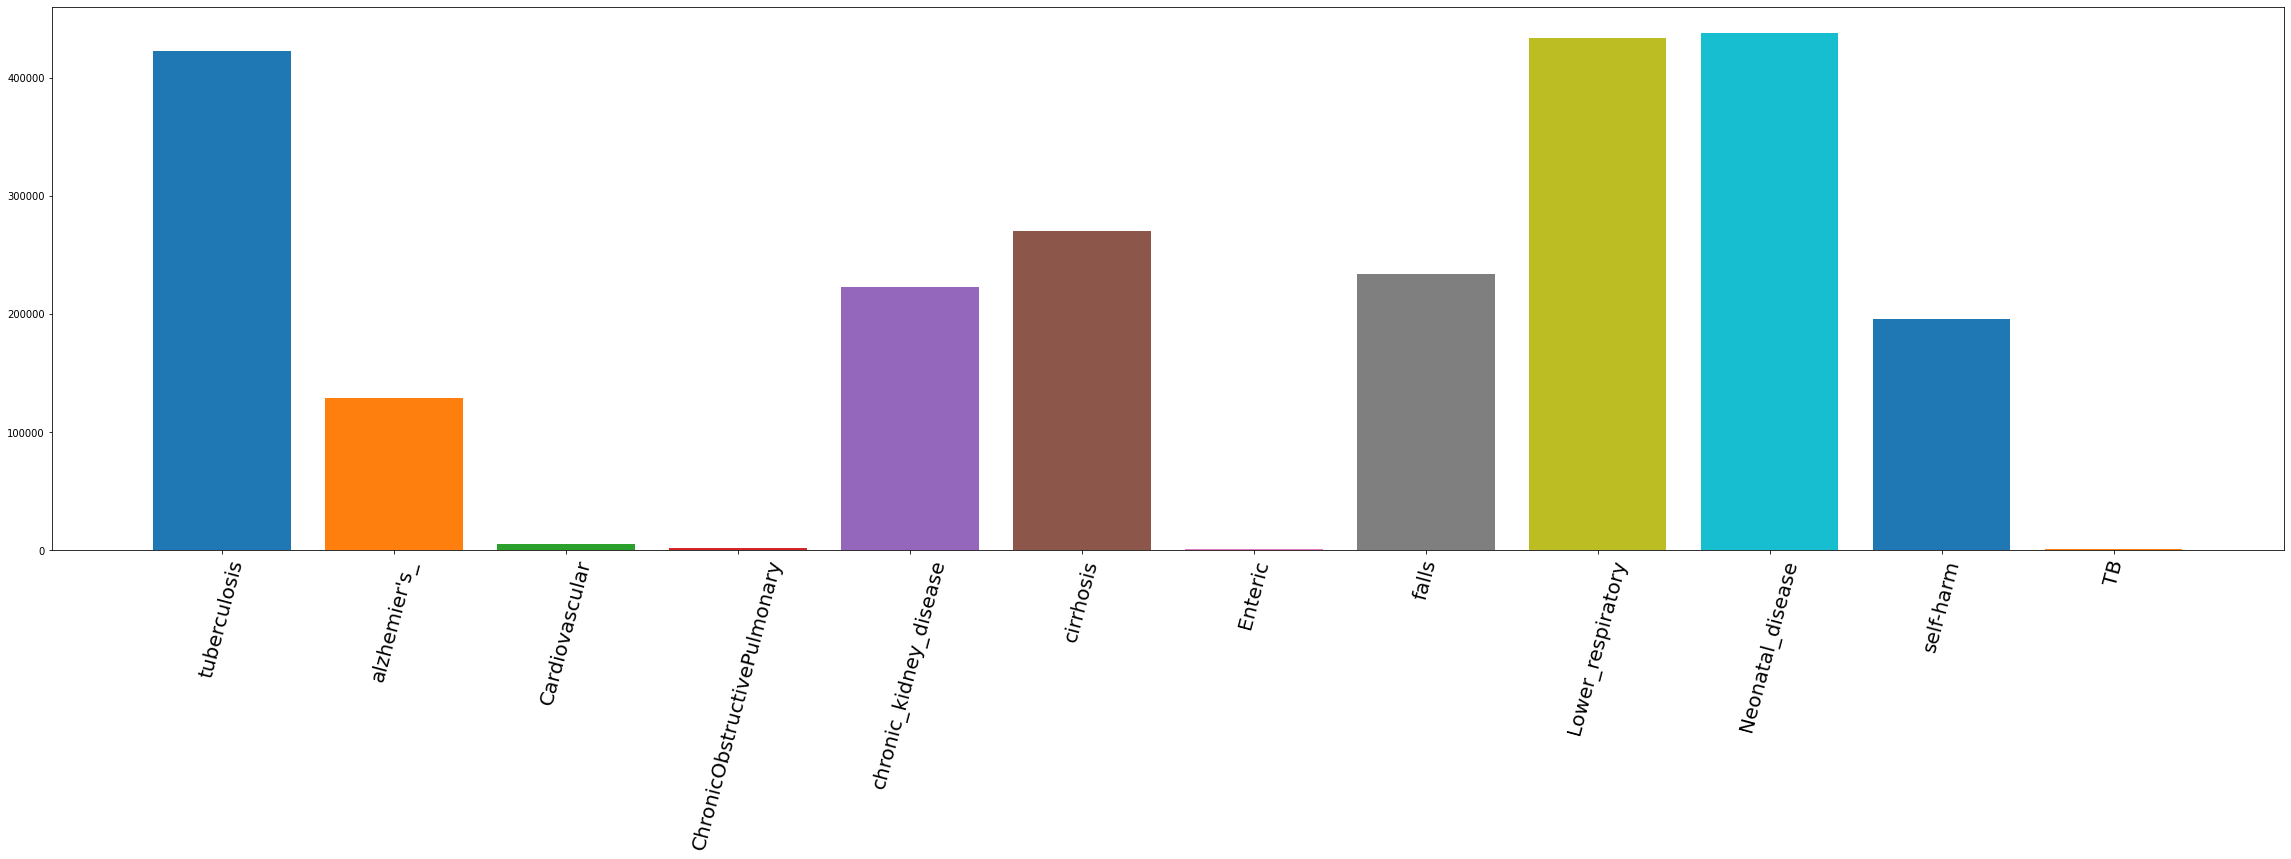

In [45]:
CSV_FILES = get_all_csv("disease_csv")
csv_file = []
for f in CSV_FILES:
    csv_file.append(f)
f = plt.figure()
df_pop = pd.read_csv('populationperstate.csv')
for i in range(len(csv_file)):
    x = pd.read_csv(csv_file[i-1])
    df = pd.DataFrame(x)
    splitf = csv_file[i-1].split(os.path.sep)
    plt.bar(splitf[-1].split('.')[0], df["Value"].sum(axis=0))
    f.set_figwidth(40)
    f.set_figheight(10)
plt.xticks(rotation = 75, fontsize = 20)
#plt.legend(loc='best', bbox_to_anchor=(.1, 0, 1, 1),fontsize = 20)

1. Plot bar graph of top death causing factor in each state
2. same as above for Diseases
3. Which disease varies most across state
4. which risk varies most across state

Plot Heatmap

In [31]:
import pythonlibraries.Heatmap_Generator as heatmap
import seaborn as sns

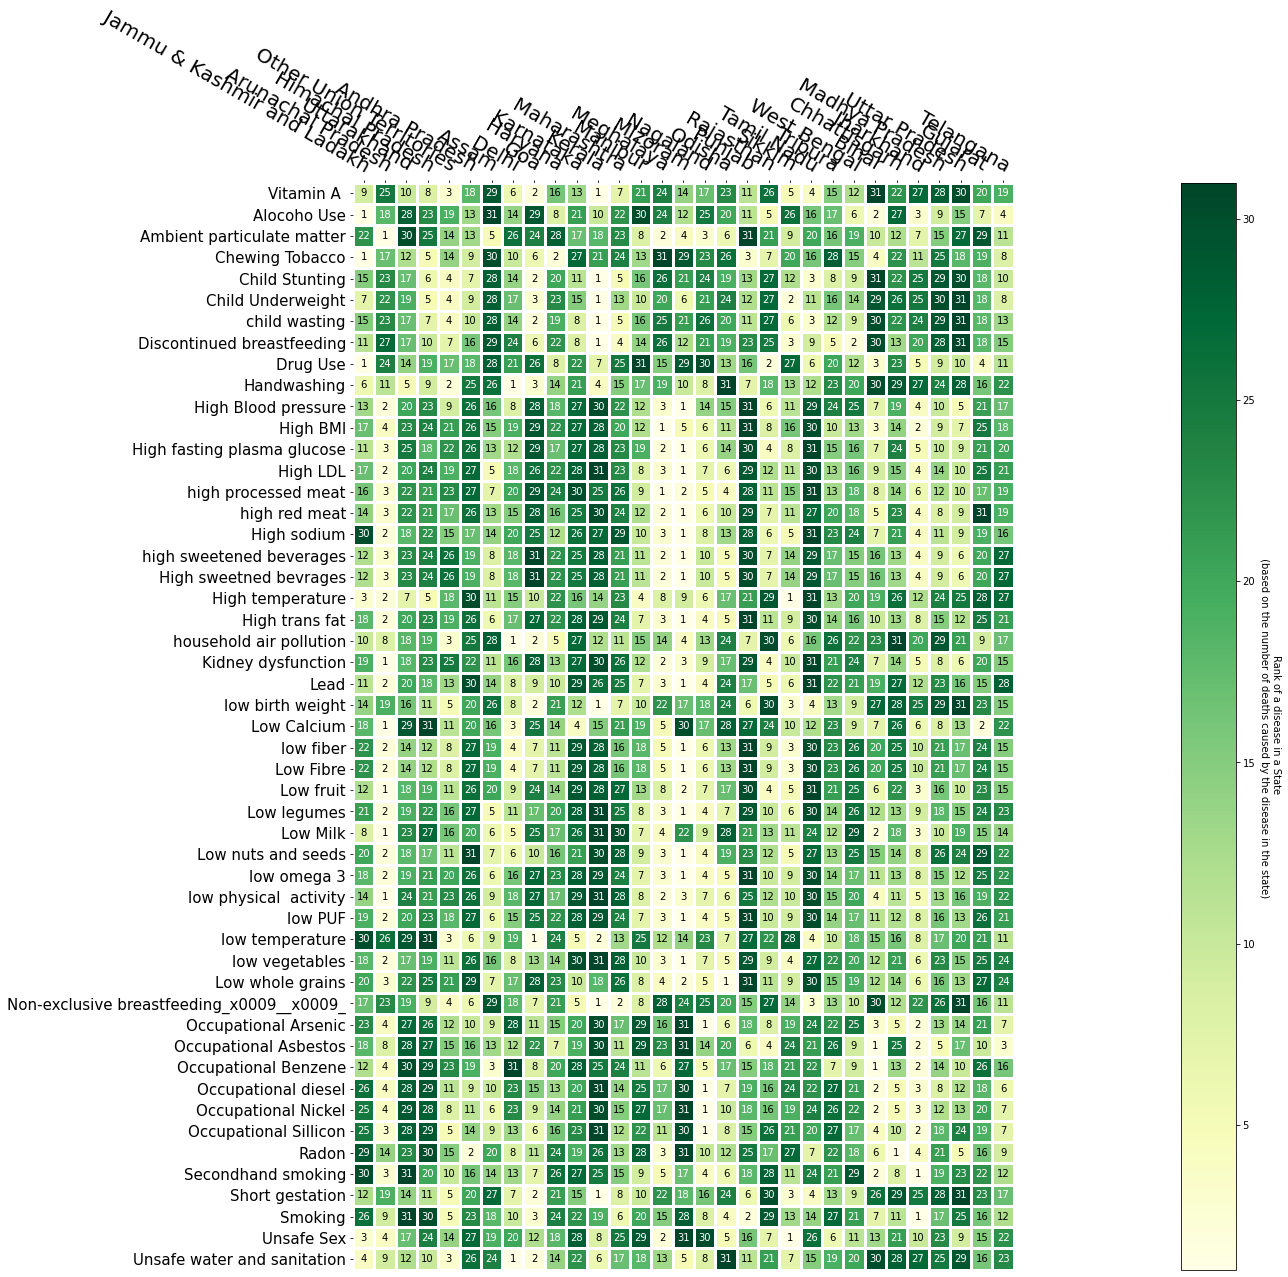

In [29]:
csv_file = get_all_csv("risk_csv")
Locations = ['Jammu & Kashmir and Ladakh', 'Arunachal Pradesh', 'Uttarakhand', 'Himachal Pradesh', 'Other Union Territories', 'Andhra Pradesh', 'Assam', 'Delhi', 'Goa', 'Haryana', 'Karnataka', 'Kerala', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'West Bengal', 'Bihar', 'Chhattisgarh', 'Jharkhand', 'Madhya Pradesh', 'Uttar Pradesh', 'Gujarat', 'Telangana']
Diseases = []
deaths = []
for i in range(len(csv_file)):
    x = pd.read_csv(csv_file[i-1])
    df = pd.DataFrame(x)
    splitf = csv_file[i-1].split(os.path.sep)
    name_file = splitf[-1].split('.')[0]
    Diseases.append(name_file)
    df["rank"] = df["Value"].rank().astype(int)
    deaths.append(df['rank'].tolist())
Deaths = np.array(deaths)
fig, ax = plt.subplots()

im, cbar = heatmap.heatmap(Deaths, Diseases, Locations, ax=ax,
                   cmap="YlGn", cbarlabel="Rank of a disease in a State \n (based on the number of deaths caused by the disease in the state)")
texts = heatmap.annotate_heatmap(im, valfmt="{x}")
#fig.tight_layout()
fig.set_figwidth(60)
fig.set_figheight(20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)

plt.show()

